# Herança
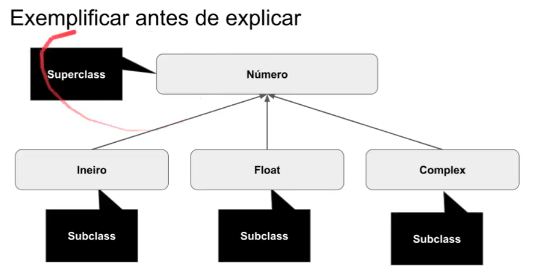
## Subclass
- Uma classe que pega as coisas da super class

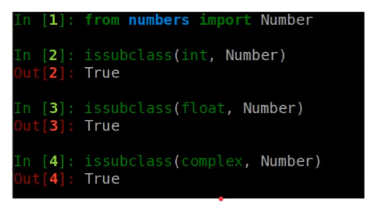
- Por exemplo, temos que int é uma sub class de number

---

- A herança permite criar tipos co-dependentes e a reutilização de código

# Herdando Pizzas

In [1]:
class Pizza:
    pedacos = 8

    @classmethod
    def mudar_tamanho(cls, pedacos):
        cls.pedacos = pedacos

- A partir dessa abstração, podemos criar abstrações de diferentes sabores, por exemplo.

In [2]:
# Aqui, Calabresa herda de Pizza
# Isso é indicado quando passamos
# o nome da SuperClass entre ()
class Calabresa(Pizza):
    ...

class Mucarela(Pizza):
    ...

# Heranças Múltiplas
- Também podemos fazer com que uma pizza herde as características de múltiplas classes simultaneamente. por exemplo:

In [3]:
class MeioAMeio(Calabresa, Mucarela):
    ...

- Neste caso, `Pizza` já é herdado por associação, não sendo necessário explicitar isso (na verdade, geraria um erro)
- Acontece que, se `Calabresa` herda `Pizza`, `MeioAMeio` já herda por associação.

In [4]:
print(MeioAMeio.pedacos)
print(Calabresa.pedacos)

MeioAMeio.mudar_tamanho(10)
print()

print(MeioAMeio.pedacos)
print(Calabresa.pedacos)

8
8

10
8


---
# Polimorfismo
- É gerado a partir da herança
- Vamos pensar que todas as pizzas tem ingredientes, e eles são diferentes (caso contrário, seriam a mesma pizza)
- Sendo assim, o método ingredientes deve mudar em cada pizza.
- **O nome dado ao comportamento de "sobrescrever" um método de uma classe é *POLIMORFISMO***
- A ideia é pegar um comportamento que já existe e mudar o seu comportamento dependendo da classe que foi herdada

In [7]:
class Pizza:
    pedacos = 8

    @classmethod
    def mudar_tamanho(cls, pedacos):
        cls.pedacos = pedacos

    @staticmethod
    def ingredientes():
        return "Ingredientes"


class Mucarela(Pizza):
    @staticmethod
    def ingredientes():
        return [
            "queijo", 
            "molho de tomate", 
            "orégano", 
            "azeitona"
        ]



print(Pizza.ingredientes())
print(Mucarela.ingredientes())

Ingredientes
['queijo', 'molho de tomate', 'orégano', 'azeitona']


---
## Problema da implementação anterior
- O problema é que o criador da subclasse não é "obrigado" a implementar/sobrescrever esse método, podendo usar a implementação original. OU seja, a nossa subclasse `Mucarela` poderia simplesmente retornar "ingredientes"
- Para isso existem as `metaclasses`

In [14]:
from abc import ABC, abstractclassmethod

class Pizza(ABC):
    pedacos = 8

    @classmethod
    def mudar_tamanho(cls, pedacos):
        cls.pedacos = pedacos

    
    @staticmethod
    @abstractclassmethod
    def ingredientes():
        return "Ingredientes"


class Mucarela(Pizza):
    ...
    @staticmethod
    def ingredientes():
        return [
            "queijo", 
            "molho de tomate", 
            "orégano", 
            "azeitona"
        ]


#print(Pizza.ingredientes())
print(Mucarela.ingredientes())

['queijo', 'molho de tomate', 'orégano', 'azeitona']
